In [ ]:
import os
os.listdir('../data/metadata')

['output_hashtags_vape.xlsx',
 'output_hashtags_mushrooms.xlsx',
 'output_hashtags_mdma.xlsx',
 'output_hashtags_hookah.xlsx',
 'output_hashtags_cocaine.xlsx',
 'output_hashtags_cigar.xlsx',
 'output_hashtags_cannabis_smoke.xlsx',
 'output_hashtags_cannabis_edibles.xlsx',
 'output_hashtags_alcohol_general.xlsx',
 'output_hashtags_alcohol_excessive.xlsx']

In [ ]:
import pandas as pd
path = '../data/metadata/'
full = pd.DataFrame()
for file in os.listdir(path):
  df = pd.read_excel(path+file)
  print(file.replace('.xlsx',''));print(round(df.organic.value_counts()/df.shape[0]*100,2));print()
  full = pd.concat([full,df])

output_hashtags_vape
No                                         35.0
Yes                                        35.0
No, but creator's other video was found    15.0
Yes, but with more effort                  10.0
Video Unavailable                           5.0
Name: organic, dtype: float64

output_hashtags_mushrooms
Yes                          70.0
No                           25.0
Yes, but with more effort     5.0
Name: organic, dtype: float64

output_hashtags_mdma
Yes    90.0
No     10.0
Name: organic, dtype: float64

output_hashtags_hookah
Yes                                        40.0
No                                         25.0
Yes, but with more effort                  20.0
No, but creator's other video was found    15.0
Name: organic, dtype: float64

output_hashtags_cocaine
Yes                  75.0
No                   20.0
Video Unavailable     5.0
Name: organic, dtype: float64

output_hashtags_cigar
Yes    70.0
No     30.0
Name: organic, dtype: float64

output_hashtags_c

In [ ]:
full.organic.unique()

array(['No', "No, but creator's other video was found", 'Yes',
       'Yes, but with more effort', 'Video Unavailable'], dtype=object)

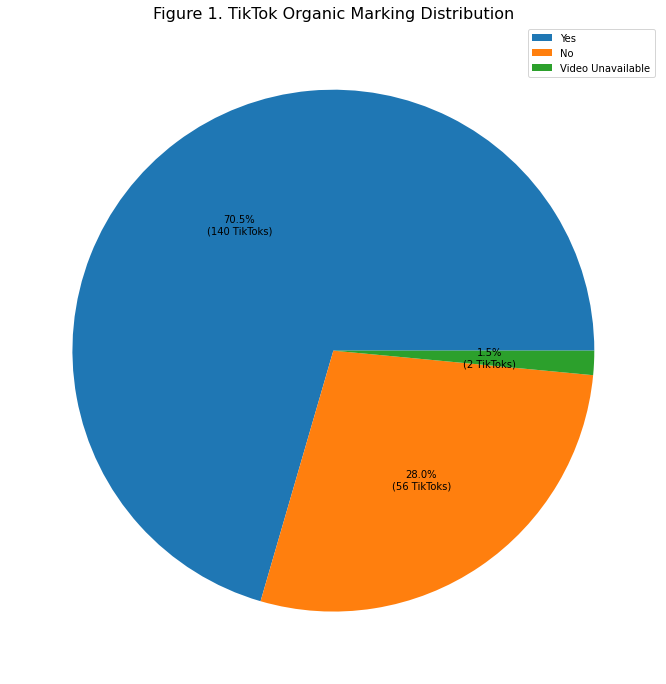

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} TikToks)".format(pct, absolute)
  
def combine(x):
    if x=='Yes' or x=='No' or x=='Video Unavailable': return x
    elif x in full.organic.unique(): return 'Yes'
    else: raise ValueError(f"Passed value must be in {full.organic.unique()}")
data = full.organic.apply(combine).value_counts()
plt.figure(figsize=(12,12))
plt.title('Figure 1. TikTok Organic Marking Distribution', fontdict={'fontsize':16})
plt.pie(data,autopct = lambda pct: func(pct, data))
plt.legend(data.index)
plt.show()